[View in Colaboratory](https://colab.research.google.com/github/akamloo/ML-Practice/blob/master/Logistic_Regression_(Iris)_with_tuning_parameter_understanding_(Week_2).ipynb)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

#using only two features for better understanding visually how LR works with different parameters
X1_sepal = iris.data[:, [0,1]]    #retreving sepal data
X2_petal = iris.data[:, [2,3]]    #     petal data
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0,0.5,'Petal Width')

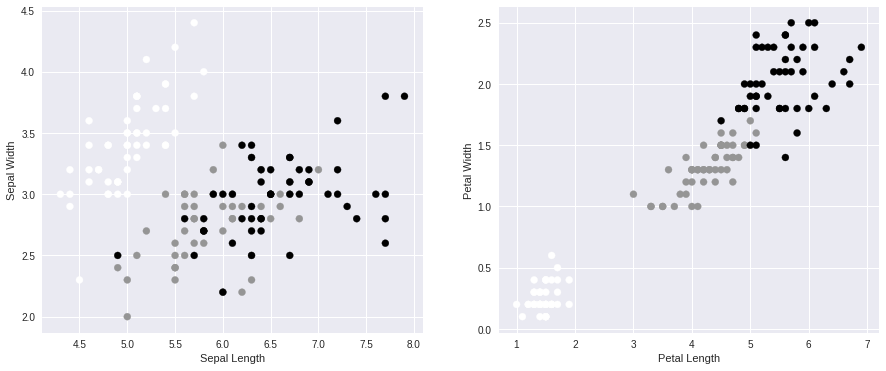

In [3]:
#visualising the given data
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [0]:
#a function for ploting decision regions

from matplotlib.colors import ListedColormap

def plt_decision_region(X, y, Classifier, test_idx = None, resolution = 0.02):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  
  color_map = ListedColormap(colors[:len(np.unique(y))])
  
  
  
  x1_min = X[:, 0].min() - 1
  x1_max = X[:, 0].max() + 1
  x2_min = X[:, 1].min() - 1
  x2_max = X[:, 1].max() + 1
  
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = Classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  plt.contour(xx1, xx2, Z, alpha=0.4, cmap=color_map)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  X_test, Y_test = X[test_idx, :], y[test_idx]
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                alpha = 0.8, c = color_map(idx),
                marker = markers[idx], label = cl)

In [5]:

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal, y, test_size = 0.3, random_state = 0)

print("# Training samples of Sepal: ", len(X_train_sepal))
print("# Testing samples of Sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal, y, test_size = 0.3, random_state = 0)

print("# Training samples of Petal: ", len(X_train_petal))
print("# Testing samples of Petal: ", len(X_test_petal))

#Scalling

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

#reseting StandardScalar
sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#combining for future purpose
X_combined_sepal_std = np.vstack((X_train_sepal_std, X_test_sepal_std))  #Combined by rows
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))              #Combined Serially

X_combined_petal_std = np.vstack((X_train_petal_std, X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# Training samples of Sepal:  105
# Testing samples of Sepal:  45
# Training samples of Petal:  105
# Testing samples of Petal:  45


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


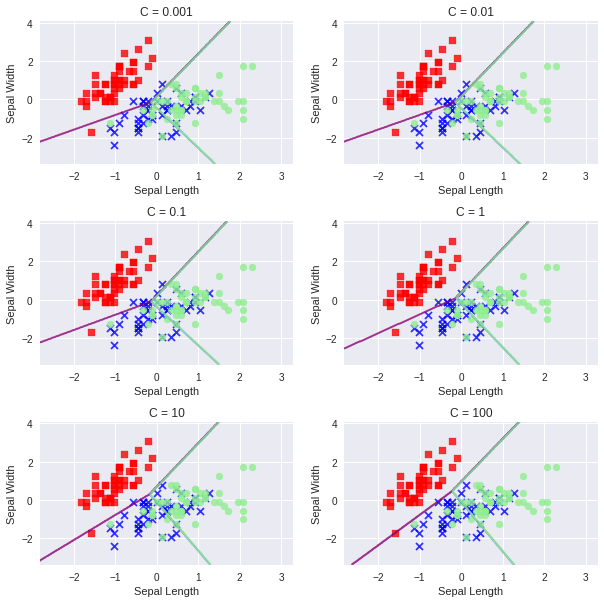

In [6]:
#Lets try LR by applying differnet Regularization values (i.e. C parameter)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve

C_para_range = [0.001, 0.01, 0.1, 1, 10, 100]

sepal_acc_table = pd.DataFrame(columns = ['C_Parameters', 'Accuracy'])
sepal_acc_table['C_Parameters'] = C_para_range

plt.figure(figsize=(10, 10))


j=0
for i in C_para_range:
  #train the model with following parameters
  lr = LogisticRegression(penalty = 'l2', C = i, random_state = 0)
  lr.fit(X = X_train_sepal_std, y= y_train_sepal)
  
  #predict using model
  y_pred_sepal = lr.predict(X_test_sepal_std)
  
  #saving accuracy score in table
  sepal_acc_table.iloc[j, 1] = accuracy_score(y_test_sepal, y_pred_sepal)
  j += 1
  
  #printing decision regions
  plt.subplot(3, 2, j)
  plt.subplots_adjust(hspace = 0.4)
  plt_decision_region(X = X_combined_sepal_std,
                      y = Y_combined_sepal,
                      Classifier = lr,
                      test_idx = range(105, 150))
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.title('C = %s'%i)

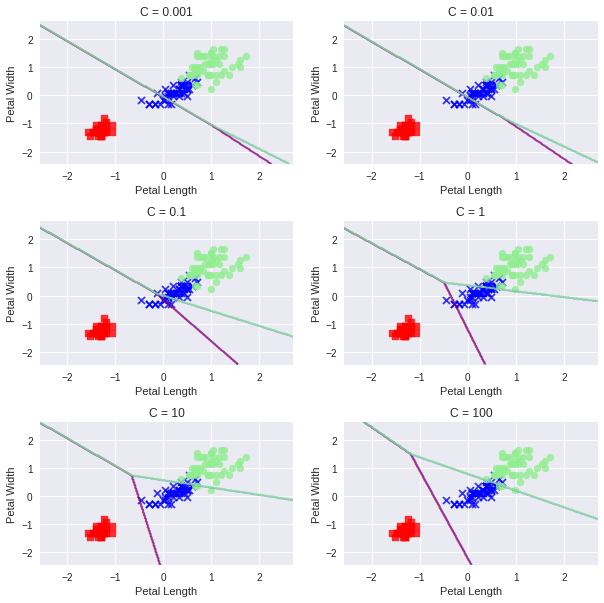

In [7]:
#now lets test the data of petals with differnet C parameters

petal_acc_table = pd.DataFrame(columns = ['C_Parameters', 'Accuracy'])
petal_acc_table['C_Parameters'] = C_para_range

plt.figure(figsize=(10, 10))
j = 0
for i in C_para_range:
  #apply LR on training Petal data
  lr = LogisticRegression(penalty = 'l2', C = i, random_state = 0)
  lr.fit(X_train_petal_std, y_train_petal)
  
  #predict values using model
  y_pred_petal = lr.predict(X_test_petal_std)
  
  #saving accuracies
  petal_acc_table.iloc[j, 1] = accuracy_score(y_test_petal, y_pred_petal)
  j += 1
  
  #printing decision region
  
  plt.subplot(3, 2, j)
  plt.subplots_adjust(hspace = 0.4)
  plt_decision_region(X = X_combined_petal_std,
                       y = Y_combined_petal,
                       Classifier = lr,
                       test_idx = range(105, 150))
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.title('C = %s'%i)

# **Understanding which C parameters are the best to use.**
A valid question to raise is, which C values must we then use?
There is a way to check which C values are best. The idea is to understand how each C value affects the accuracy of the training set and the testing set.

Remember that our goal is always to create a model that can generalise to unseen data.

The way to do this is to plot validation curves.¶

## **Use of validation curves for both datasets.**

(0.5, 1)

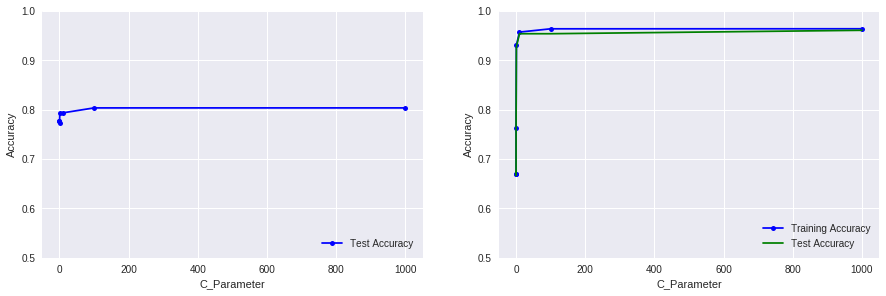

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve

## Use of validation score for both datasets.

C_para_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

plt.figure(figsize=(15, 10))

# Apply RL for training dataset
lr = LogisticRegression(penalty = 'l2', C = i, random_state = 0)

train_sepal_scores, test_sepal_scores = validation_curve(estimator = lr,
                                                         X = X_combined_sepal_std,
                                                         y = Y_combined_sepal,
                                                         param_name='C',
                                                         param_range = C_para_range)

train_sepal_mean = np.mean(train_sepal_scores, axis = 1)
train_sepal_std = np.std(train_sepal_scores, axis = 1)
test_sepal_mean = np.mean(test_sepal_scores, axis = 1)
test_sepal_std = np.std(test_sepal_scores, axis = 1)

plt.subplot(2, 2, 1)
plt.plot(C_para_range,
         train_sepal_mean,
         color = 'blue',
         marker = 'o',
         markersize = 5,
         label = 'Test Accuracy')

plt.xlabel('C_Parameter')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.5, 1])

#PETAL plot validation curve

train_petal_scores, test_petal_scores = validation_curve(estimator = lr,
                                                         X = X_combined_petal_std,
                                                         y = Y_combined_petal,
                                                         param_name = 'C',
                                                         param_range = C_para_range)

train_petal_mean = np.mean(train_petal_scores, axis = 1)
train_petal_std = np.std(train_petal_scores, axis = 1)
test_petal_mean = np.mean(test_petal_scores, axis = 1)
test_petal_std = np.std(test_petal_scores, axis = 1)

plt.subplot(2, 2, 2)
plt.plot(C_para_range,
         train_petal_mean,
         color = 'blue',
         marker = 'o',
         markersize = 5,
         label = 'Training Accuracy')

plt.plot(C_para_range,
         test_petal_mean,
         color = 'green',
         marker = 'x',
         markersize = 5,
         label = 'Test Accuracy')

plt.xlabel('C_Parameter')
plt.ylabel('Accuracy')

plt.legend(loc = 'lower right')
plt.ylim([0.5, 1])